#Problem Statement:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?






2. How well those variables describe the electric cycle demands?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical

from scipy.stats import ttest_ind, t, ttest_1samp, ttest_rel

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2023-10-20 10:12:42--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.46, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.06s   

2023-10-20 10:12:42 (10.8 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [ ]:
df1 = pd.read_csv("bike_sharing.csv?1642089089")

In [ ]:
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#Exploratory Data Analysis

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Changing ths data type of the variable as required

In [ ]:
df1["datetime"] = pd.to_datetime(df1['datetime'])
df = df1.astype({'season': object, 'weather': object, 'holiday': object, 'workingday': object, 'temp': object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  object        
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1020.7+ KB


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.describe(include="all")

<ipython-input-30-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,49.00,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,14.76,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,467.00,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,NaN,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#There is no Missing value

#Univariate Analysis

In [ ]:
weather_count = df.groupby("weather", as_index=False)['count'].agg('sum')
weather_count = weather_count.astype({'weather': object})
weather_count

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


<Axes: xlabel='weather', ylabel='count'>

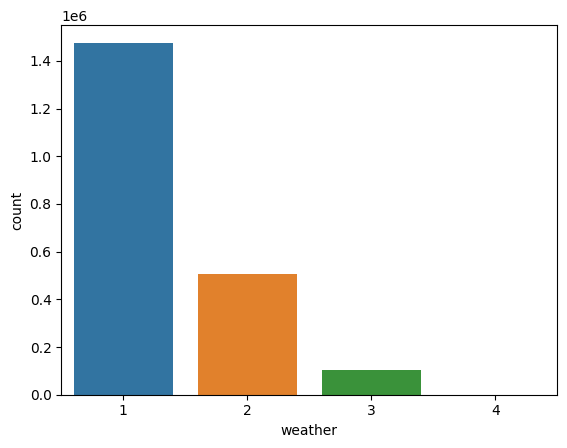

In [ ]:
sns.barplot(weather_count, x= "weather", y = "count")

Count of rented cycle is highest in weather one with

In [ ]:
season_count = df.groupby("season", as_index=False)['count'].agg('sum')
season_count = season_count.astype({'season': object})
season_count

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


<Axes: xlabel='season', ylabel='count'>

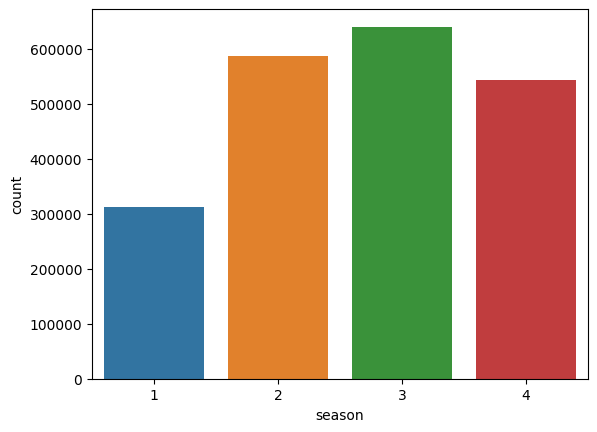

In [ ]:
sns.barplot(season_count, x= "season", y = "count")

#Bivariate Analysis

<Axes: xlabel='season', ylabel='weather'>

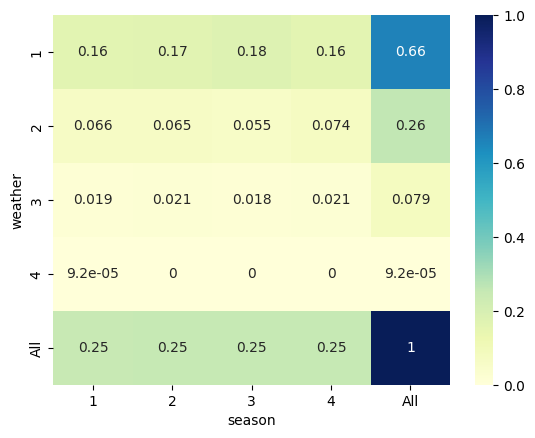

In [ ]:
season_weather_corr = pd.crosstab(df1["weather"], df1["season"], normalize = True, margins=True)
sns.heatmap(season_weather_corr, annot=True, cmap='YlGnBu')

Weather 1 is highest occurance and we know that the highest renting happens in weather 1.

#Section 2

1. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

# section 2.1      ---- 2 Sample T-test  

Working Day has an effect on the number of electric cycles rented

Ho = Mean of rented cycles in workingday and non working day is same
(mu ho = mu ha)

Ha = Mean cycle rented on working day is greater than Non-working day
(mu ho > mu ha)


significance is 5%

In [ ]:
workingday = df[df["workingday"]== 1]["count"]
print("Working day cycle rent Mean", workingday.mean())
non_workingday = df[df["workingday"]== 0]["count"]
print("Working day cycle rent Mean", non_workingday.mean())

h_o = "Mean of rented cycles in workingday and Non-working day is same"
h_a = "Mean cycle rented on working day is greater than Non-working day"

alpha = 0.05
tstat, p_value= ttest_ind(workingday, non_workingday, alternative="greater")

print("P value", p_value)
if p_value < alpha:
  print("Ho is Rejected: Alternative hypothesis is true", h_a)
else:
  print("Ho is not Rejected: Null Hypothesis is true", h_o)


Working day cycle rent Mean 193.01187263896384
Working day cycle rent Mean 188.50662061024755
P value 0.11322402113180674
Ha is not Rejected: Null Hypothesis is true Mean of rented cycles in workingday and Non-working day is same


#2 Sample T Test for Holiday as well

Ho = Mean of rented cycles in holiday and Non- holiday is same (mu ho = mu ha)

Ha = Mean of rented cycles in holiday and Non- holiday is not same (mu ho != mu ha)

significance is 5%

In [ ]:
# Performing 2 sample t test for holiday

Holiday = df[df["holiday"]== 1]["count"]
print(Holiday.mean())
non_holiday = df[df["holiday"]== 0]["count"]
print(non_holiday.mean())

h_o = "Mean of rented cycles in holiday and Non- holiday is same"
h_a = "Mean of rented cycles in holiday and Non- holiday is not same"

alpha = 0.05
tstat, p_value= ttest_ind(Holiday, non_holiday, alternative="two-sided")
print(p_value)
if p_value > alpha:
  print("Failed to reject Ho", h_o)
else:
  print("Reject Ho", h_a)

185.87781350482314
191.7416548463357
0.5736923883271103
Failed to reject Ho Mean of rented cycles in holiday and Non- holiday is same


#Section 2.2 ANNOVA to check if No. of cycles rented is similar or different in different

1. weather

2. season

#Section 2.2.1 Effect of weather in rented Cycle

Ho = Mean of rented cycle in all 4 weather is same
mu1 = mu2 = mu3 = mu4

Ha = Mean of rented cycle for at least 1 weather is NOT same


mu1 != mu2 = mu3 = mu4

mu1 = mu2 != mu3 = mu4

mu1 = mu2 = mu3 != mu4


Significance is 1%

In [ ]:
from scipy.stats import f, f_oneway, shapiro, ttest_ind, levene, kruskal

In [ ]:
# Performing Anova test for effect of Weather
weather_1= df1[df1["weather"]==1]["count"]
weather_2= df1[df1["weather"]==2]["count"]
weather_3= df1[df1["weather"]==3]["count"]
weather_4= df1[df1["weather"]==4]["count"]

In [ ]:
f_stat, p_value = f_oneway(weather_1, weather_2, weather_3,weather_4)

print("f_stat: ", f_stat)
print("p-value: ", p_value)

#Significance level is 1%
alpha = 0.01
if p_value < alpha:
    print("Reject Ho: Mean of rented cycle for at least 1 weather is NOT same")
else:
    print("Failed to reject Ho: Number of bikes rented in different weather is similar")

f_stat:  65.53024112793271
p-value:  5.482069475935669e-42
Reject Ho: Mean of rented cycle for at least 1 weather is NOT same


<Axes: xlabel='weather', ylabel='count'>

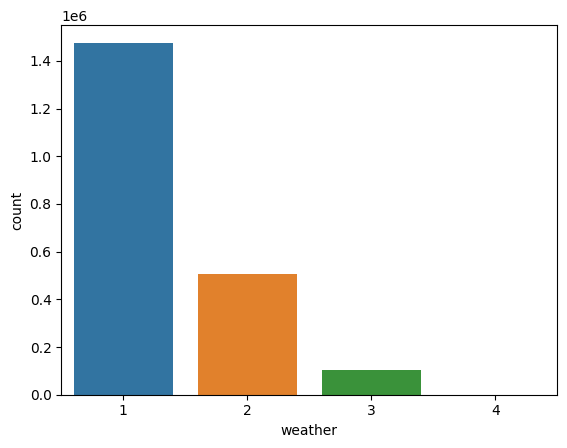

In [ ]:
sns.barplot(weather_count, x= "weather", y = "count")

Section 2.2.2 Effect of Season in rented Cycle

Ho = Mean of rented cycle in all 4 Season is same

mu1 = mu2 = mu3 = mu4

Ha = Mean of rented cycle for at least 1 season is NOT same

mu1 != mu2 = mu3 = mu4

mu1 = mu2 != mu3 = mu4

mu1 = mu2 = mu3 != mu4

Significance is 1%

In [ ]:
# Performing Anova test for effect of Season
season_1= df1[df1["season"]==1]["count"]
season_2= df1[df1["season"]==2]["count"]
season_3= df1[df1["season"]==3]["count"]
season_4= df1[df1["season"]==4]["count"]

In [ ]:
f_stat, p_value = f_oneway(season_1,season_2, season_3,season_4)

print("f_stat: ", f_stat)
print("p-value: ", p_value)

# Significance level is 1%
alpha = 0.01
if p_value < alpha:
    print("Reject Ho: Mean of rented cycle for at least 1 season is NOT same")
else:
    print("Failed to reject Ho: Mean of rented cycle in all 4 Season is same ")

f_stat:  236.94671081032106
p-value:  6.164843386499654e-149
Reject Ho: Mean of rented cycle for at least 1 season is NOT same


<Axes: xlabel='season', ylabel='count'>

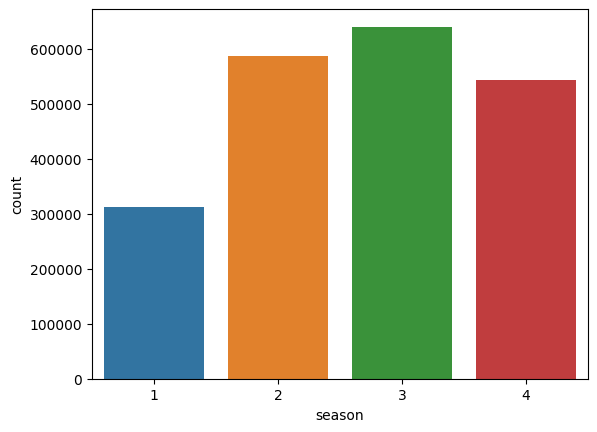

In [ ]:
sns.barplot(season_count, x= "season", y = "count")

#section 2.3 Chi-square test to check if Weather is dependent on the season (10 points)


Ho = Weather is Not dependent on Season

Ha = Weather is dependent on Season

In [ ]:
# Creating table for Chi square test
season_weather_corr = pd.crosstab(df1["weather"], df1["season"], margins=True)
season_weather_corr

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:
chi_stat, p_value, dof, expected_freq = chi2_contingency(season_weather_corr)
print("Chi_Stat: ", chi_stat)
print("p_value: ", p_value)
print("dof: ", dof)
print("expected_freq: ", expected_freq)

# Checking for significance level of 5%
alpha = 0.05
if p_value < alpha:
    print("Interpretation: Reject Ho - Weather is dependent on the season")
else:
    print("Interpretation: Failed to reject Ho- Weather is Not dependent on Season")

Chi_Stat:  49.15865559689363
p_value:  3.1185273325126814e-05
dof:  16
expected_freq:  [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03
  7.19200000e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02
  2.83400000e+03]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02
  8.59000000e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01
  1.00000000e+00]
 [2.68600000e+03 2.73300000e+03 2.73300000e+03 2.73400000e+03
  1.08860000e+04]]
Interpretation: Reject Ho - Weather is dependent on the season


In [ ]:
# Checking for Significance level of 1%

alpha = 0.01
if p_value < alpha:
    print("Interpretation: Reject Ho - Weather is dependent on the season")
else:
    print("Interpretation: Failed to reject Ho - Weather is Not dependent on Season")

Interpretation: Reject Ho - Weather is dependent on the season


Notebook Quality (10 points):

1. Structure & Flow
Ans- Done as mentioned in the Business case study

2. Well commented code
Ans- Comments are done in every code section

#Solution Of Problem Statement

#1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

Solution -

**Weather** Variable Weather is highly predictive for demand of Shared electric cycle.
Weather of code 1: Clear, Few clouds, partly cloudy, partly cloudy is highest rented cycle and code 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is least

**Season** Variable Season is also highly predictive for demand of Shared electric cycle.
season of code 3: Fall is highest rented cycle and code 1: Spring is least

**Holiday and Working day** Holiday and non-Holiday doesen't have any effet on renting cycle Also, working day and Non-working day have no effect on cycle renting

#2. How well those variables describe the electric cycle demands

**Weather** Pvalue of  effect of weather on renting of cycle is:
p-value:  5.482069475935669e-42
Even with the 1% significance level we are able to Reject the Ho.

**Season** Pvalue of  effect of season on renting of cycle is:
p-value:  6.164843386499654e-149
Even with the 1% significance level we are able to Reject the Ho.
